In [1]:
%autosave 10

Autosaving every 10 seconds


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve,precision_recall_curve,auc

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [6]:
df = pd.read_csv('cleaned_data.csv')
X_train, X_test, y_train, y_test = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,test_size=0.2)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [9]:
lr_model =  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
lr_model.fit(X_train,y_train)

c:\users\aksha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [10]:
pred = lr_model.predict_proba(X_test)

### Using Logistic on Education features

In [27]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,test_size=0.2)
lr_model_2 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
lr_model_2.fit(X_train_1,y_train_1)
education_pred = lr_model_2.predict_proba(X_test_2)
roc_auc_score(y_test_2,education_pred[:,1])

c:\users\aksha\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [16]:
roc_auc_score(y_test,pred[:,1])

0.6151794612480548

Roc value in case of limit_bal feature is more because it is more related to the financial aspect of whether a client will be default or not 

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

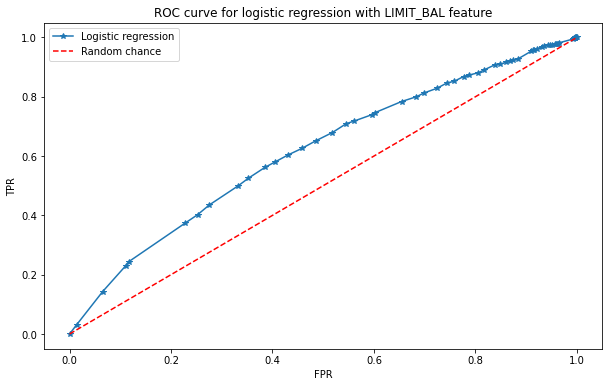

In [20]:
fpr_2, tpr_2, thresholds_2 =roc_curve(y_test,pred[:,1])
plt.figure(figsize=(10,6))
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [31]:
precision, recall, thresh = precision_recall_curve(y_test, pred[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0.0, 1.0)

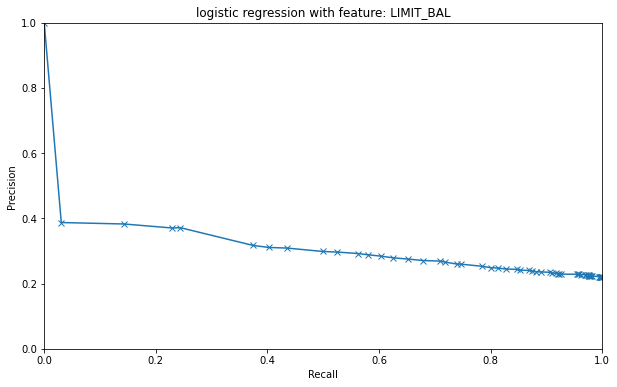

In [33]:
plt.figure(figsize=(10,6))
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('logistic regression with feature: LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [37]:
auc(recall,precision)

0.31568834580023875

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [38]:
trains_pred = lr_model.predict_proba(X_train)
roc_auc_score(y_train,trains_pred[:,1])

0.619585925213674

    How is this different, conceptually and quantitatively, from your earlier calculation?


Quantitatively both the values are ~ 0.62 so there is no such difference. But Conceptually there is thing that we have noticed.
roc_auc value tell us who well our data is fitted on the model. and 0.62 value is low but for training and testing data both the valeus are similar which means that m=our model is able to perform the same in case of unseen data which is good